**The purpose of this study is to explore the relationship between various health indicators and the risk of developing diabetes. By analyzing data from the Behavioral Risk Factor Surveillance System (BRFSS), the study aims to identify key factors that contribute to the likelihood of diabetes. The study seeks to understand how various health conditions and lifestyle choices impact the prevalence of diabetes among individuals. Through this analysis, the study aims to provide insights that could inform public health strategies and interventions aimed at reducing the incidence of diabetes by addressing modifiable risk factors**

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [47]:
import pandas as pd

file_path = 'diabetes_binary_health_indicators_BRFSS2015.csv'

diabetes_df = pd.read_csv(file_path)
diabetes_df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Understanding The Given Variables

**Diabetes_binary** :  0 = no diabetes 1 = diabetes

**HighBP** : 0 = no high BP 1 = high BP

**HighChol** : 0 = no high cholesterol 1 = high cholesterol

**CholCheck** : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI** : BMI Scale: &emsp; <18.5lbs =Underweight &emsp; 18.5-24.9lbs=Healthy Weight &emsp; 25-29.5lbs=Overweight &emsp; 30lbs and Above = Obese

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? 5 packs = 100 cigarettes. 0 = no 1 = yes

**Stroke** : (Ever told) you had a stroke. 0 = no 1 = yes

**HeartDiseaseorAttack** : Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhysActivity** : Physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits** : Consume Fruit 1 or more times per day 0 = no 1 = yes

**Veggies** : Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

**AnyHealthcare** : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

**GenHlth** : General Health: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

**MentHlth** : Mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days have you felt a mental illness. 

**PhysHlth** : Physical health, which includes physical illness and injury, for how many days during the past 30 days have you felt ill or injured.

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Sex** : 0 = female 1 = male 

**Age** : 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older (See AGEG5YR codebook)

**Education** : Scale 1-6 1 = Never attended school or only kindergarten 6 = College graduate (See EDUCA codebook)

**Income** : Scale 1-8 1 = less than 10,000usd &emsp; 5 = less than 35,000usd &emsp; 8 = 75,000usd or more (See Income2 codebook)

In [58]:
diabetes_df.shape

(253680, 22)

In [59]:
print(diabetes_df.info())
diabetes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**There are 22 features in this data. 253680 samples are present in this dataset. There are no null values**

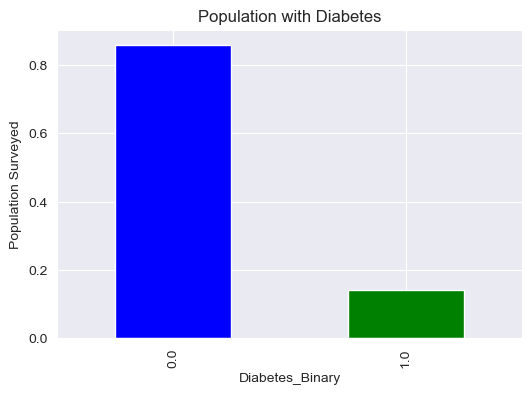

In [60]:
plt.figure(figsize=(6, 4))
value_counts = diabetes_df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'green'])
plt.title('Population with Diabetes')
plt.xlabel('Diabetes_Binary')
plt.ylabel('Population Surveyed')
plt.show()
#plt.bar(value_counts.index, value_counts, color=['blue', 'green'], width=0.3)

<Axes: ylabel='Diabetes_binary'>

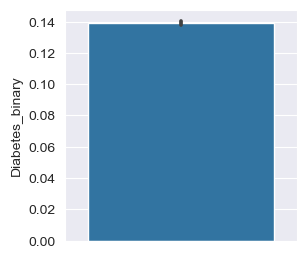

In [113]:
plt.figure(figsize=(3, 3))
sns.barplot(y='Diabetes_binary', data=diabetes_df)

**Among the population surveyed, approximately 14% of the population have diabetes**

In [67]:
th=0.20
variables=['HighBP', 'CholCheck','BMI_Category','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth', 'MentHlth_Category','PhysHlth_Category','DiffWalk','Sex','Age_Category', 'Education_Level', 'Income_Level']
diabetes_df['BMI_Category'] = pd.cut(diabetes_df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')])
diabetes_df['MentHlth_Category'] = pd.cut(diabetes_df['MentHlth'], bins=[0, 10, 21, 30])
diabetes_df['PhysHlth_Category'] = pd.cut(diabetes_df['PhysHlth'], bins=[0, 10, 21, 30])
diabetes_df['Age_Category'] = pd.cut(diabetes_df['Age'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
diabetes_df['Education_Level'] = pd.cut(diabetes_df['Education'], bins=[0, 1, 2, 3, 4, 5, 6])
diabetes_df['Income_Level'] = pd.cut(diabetes_df['Income'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8])
for v in variables: 
    r = diabetes_df.groupby(v).mean(numeric_only=True)['Diabetes_binary']
    if not r[r>th].empty:
        print(r[r>th])
        print('----------------------------------------')

HighBP
1.0    0.244457
Name: Diabetes_binary, dtype: float64
----------------------------------------
BMI_Category
(29.9, inf]    0.233998
Name: Diabetes_binary, dtype: float64
----------------------------------------
Stroke
1.0    0.317528
Name: Diabetes_binary, dtype: float64
----------------------------------------
HeartDiseaseorAttack
1.0    0.32972
Name: Diabetes_binary, dtype: float64
----------------------------------------
PhysActivity
0.0    0.211448
Name: Diabetes_binary, dtype: float64
----------------------------------------
GenHlth
4.0    0.310105
5.0    0.378942
Name: Diabetes_binary, dtype: float64
----------------------------------------
MentHlth_Category
(21, 30]    0.226264
Name: Diabetes_binary, dtype: float64
----------------------------------------
PhysHlth_Category
(10, 21]    0.245869
(21, 30]    0.294611
Name: Diabetes_binary, dtype: float64
----------------------------------------
DiffWalk
1.0    0.307463
Name: Diabetes_binary, dtype: float64
------------------

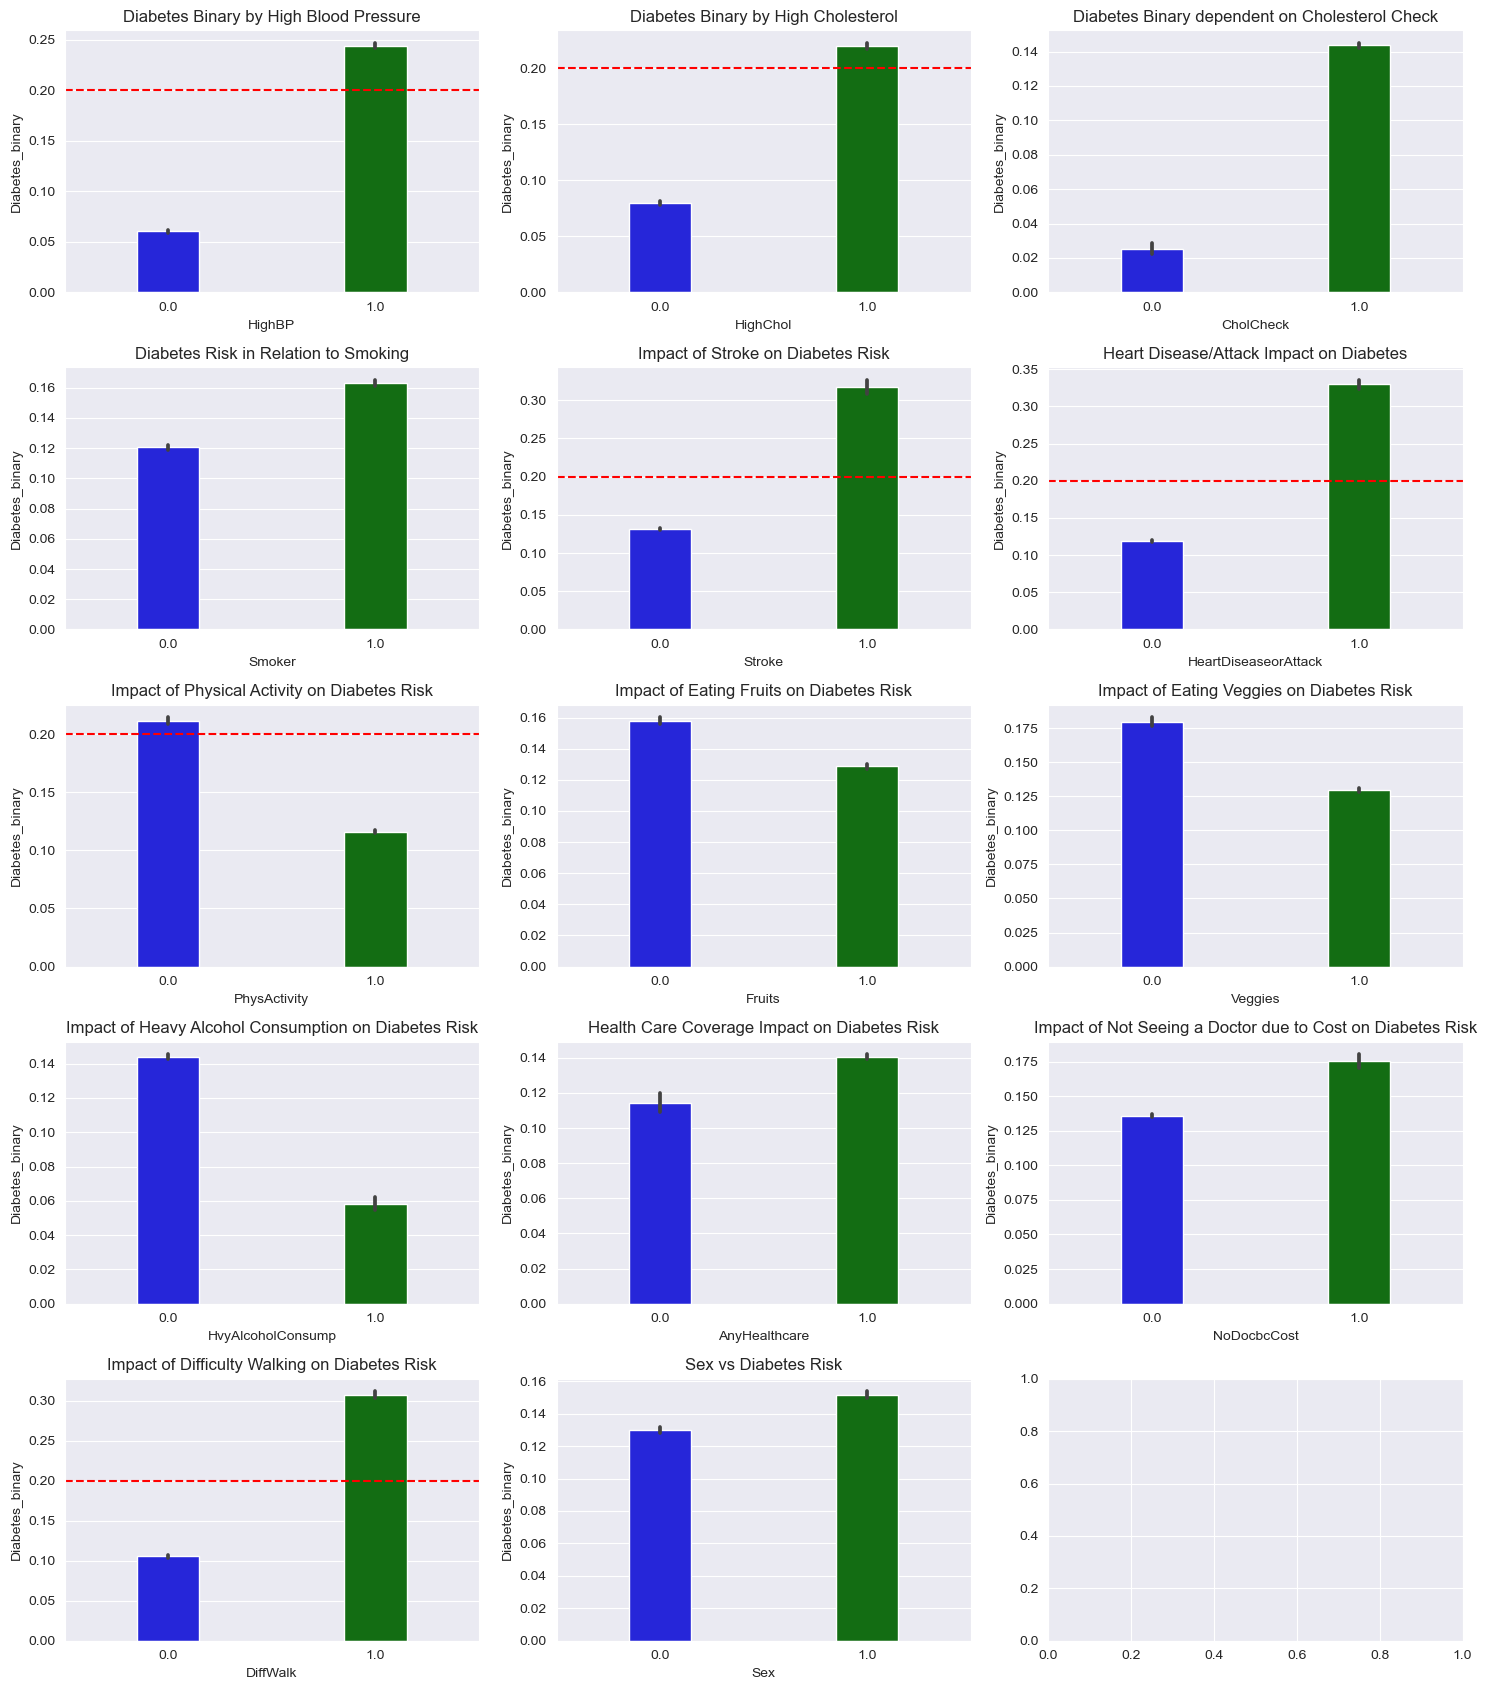

In [6]:
fig, axes = plt.subplots(5, 3, figsize=(15, 17))

sns.barplot(ax=axes[0,0], x='HighBP', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[0,0].axhline(0.20, color='r', linestyle='dashed')
axes[0,0].set_title('Diabetes Binary by High Blood Pressure')


sns.barplot(ax=axes[0,1], x='HighChol', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[0,1].axhline(0.20, color='r', linestyle='dashed')
axes[0,1].set_title('Diabetes Binary by High Cholesterol')

sns.barplot(ax=axes[0,2], x='CholCheck', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[0,2].set_title('Diabetes Binary dependent on Cholesterol Check')

sns.barplot(ax=axes[1,0], x='Smoker', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[1,0].set_title('Diabetes Risk in Relation to Smoking')

sns.barplot(ax=axes[1,1], x='Stroke', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[1,1].axhline(0.20, color='r', linestyle='dashed')
axes[1,1].set_title('Impact of Stroke on Diabetes Risk')

sns.barplot(ax=axes[1,2], x='HeartDiseaseorAttack', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[1,2].axhline(0.20, color='r', linestyle='dashed')
axes[1,2].set_title('Heart Disease/Attack Impact on Diabetes')

sns.barplot(ax=axes[2,0], x='PhysActivity', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[2,0].axhline(0.20, color='r', linestyle='dashed')
axes[2,0].set_title('Impact of Physical Activity on Diabetes Risk')

sns.barplot(ax=axes[2,1], x='Fruits', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[2,1].set_title('Impact of Eating Fruits on Diabetes Risk')

sns.barplot(ax=axes[2,2], x='Veggies', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[2,2].set_title('Impact of Eating Veggies on Diabetes Risk')

sns.barplot(ax=axes[3,0], x='HvyAlcoholConsump', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[3,0].set_title('Impact of Heavy Alcohol Consumption on Diabetes Risk')

sns.barplot(ax=axes[3,1], x='AnyHealthcare', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[3,1].set_title('Health Care Coverage Impact on Diabetes Risk')

sns.barplot(ax=axes[3,2], x='NoDocbcCost', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[3,2].set_title('Impact of Not Seeing a Doctor due to Cost on Diabetes Risk')

sns.barplot(ax=axes[4,0], x='DiffWalk', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[4,0].axhline(0.20, color='r', linestyle='dashed')
axes[4,0].set_title('Impact of Difficulty Walking on Diabetes Risk')

sns.barplot(ax=axes[4,1], x='Sex', y='Diabetes_binary', data=diabetes_df, palette=['blue', 'green'], saturation=0.7, width=0.3)
axes[4,1].set_title('Sex vs Diabetes Risk')

plt.tight_layout()
plt.show()


**Threshold 0.20: High blood pressure, high cholesterol, history of stroke, and heart disease or attack have strong correlations with diabetes. This suggests a strong association between these conditions and risk of developing diabetes**

**Difficulty in walking is signficantly higher among those with diabetes, which could be both a consequence and a contributing factor to diabetes**

**Physical activity is lower among individuals with diabetes, indicating that a lack of physical activity may contribute to the risk of diabetes**

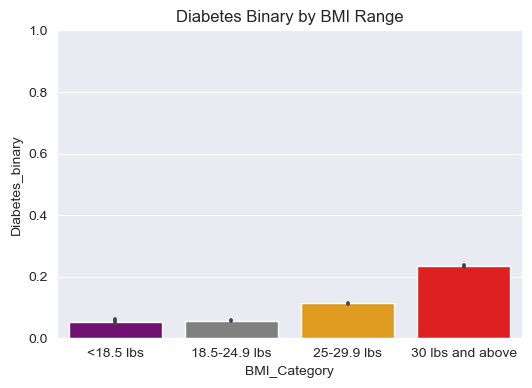

In [74]:
diabetes_df['BMI_Category'] = pd.cut(diabetes_df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
labels=['<18.5 lbs', '18.5-24.9 lbs', '25-29.9 lbs', '30 lbs and above'])

plt.figure(figsize=(6, 4))
sns.barplot(x='BMI_Category', y='Diabetes_binary', data=diabetes_df, palette=['purple', 'grey', 'orange', 'red'])
plt.ylim(0,1)
plt.title('Diabetes Binary by BMI Range')
plt.show()


**BMI Scale: &emsp; <18.5lbs =Underweight &emsp; 18.5-24.9lbs=Healthy Weight &emsp; 25-29.5lbs=Overweight &emsp; 30lbs and Above = Obese**

**Individuals with a higher BMI have an increased likelihood of developing diabetes. Individuals in the 30lbs and above BMI category have the highest prevlance of diabetes**

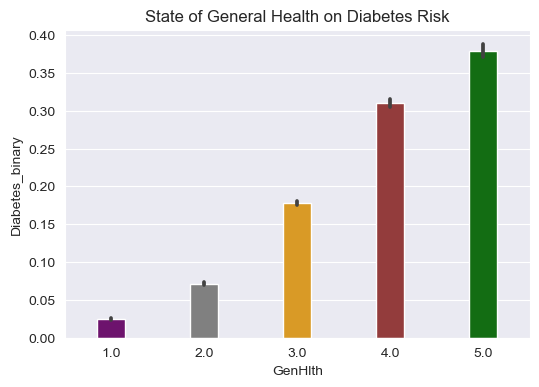

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(x='GenHlth', y='Diabetes_binary', data=diabetes_df, palette=['purple', 'grey', 'orange', 'brown', 'green'], saturation=0.7, width=0.3)
plt.title('State of General Health on Diabetes Risk')
plt.show()


**General Health Scale: 1-5 &emsp;  1 = excellent &emsp;  2 = very good &emsp; 3 = good&emsp;  4 = fair&emsp;  5 = poor**

**Individuals who report poorer general health have a higher prevalence of diabetes. The graph highlights the importance of general health on diabetes risk, suggesting that interventions at improving overall health may be beneficial in reducing the incidence of diabetes**

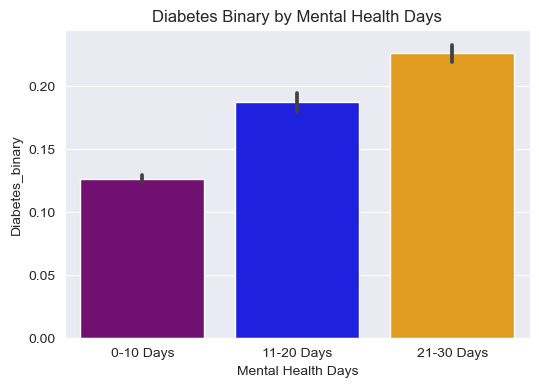

In [75]:
diabetes_df['MentHlth_Category'] = pd.cut(diabetes_df['MentHlth'], bins=[0, 10, 21, 30],
labels=['0-10 Days', '11-20 Days', '21-30 Days'])

plt.figure(figsize=(6, 4))
sns.barplot(x='MentHlth_Category', y='Diabetes_binary', data=diabetes_df, palette=['purple', 'blue', 'orange'])
plt.xlabel('Mental Health Days')
plt.title('Diabetes Binary by Mental Health Days')
plt.show()


**Individuals with a higher number of mental health days showed an increased likelihood of developing diabetes. Individuals reporting 21-30 days of mental health issues show the highest prevalence of diabetes, signficantly higher than those reporting fewer mental health days** 

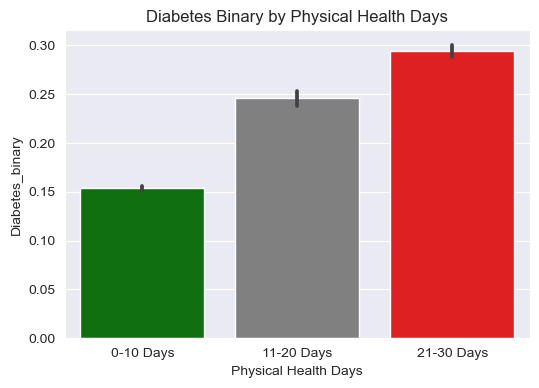

In [76]:
diabetes_df['PhysHlth_Category'] = pd.cut(diabetes_df['PhysHlth'], bins=[0, 10, 21, 30],
labels=['0-10 Days', '11-20 Days', '21-30 Days'])

plt.figure(figsize=(6, 4))
sns.barplot(x='PhysHlth_Category', y='Diabetes_binary', data=diabetes_df, palette=['green', 'grey', 'red'])
plt.xlabel('Physical Health Days')
plt.title('Diabetes Binary by Physical Health Days')
plt.show()

**Individuals reporting 21-30 days of physical health issues exhibit the highest prevalence of diabetes, significantly more than those reporting fewer days. This trend underscores the importance of physical health in managing and potentially reducing the risk of diabetes**

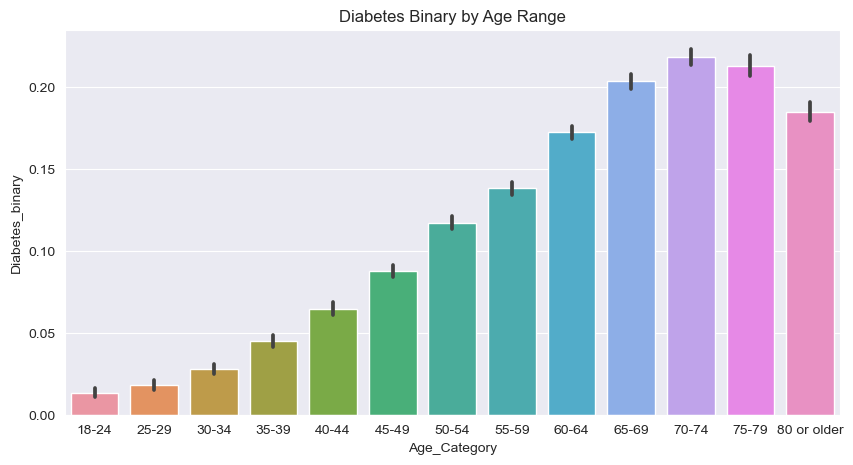

In [114]:
diabetes_df['Age_Category'] = pd.cut(diabetes_df['Age'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Category', y='Diabetes_binary', data=diabetes_df)
plt.title('Diabetes Binary by Age Range')
plt.show()

**The graph presents a clear upward trend as age increaes, the likelihood of having diabetes also increases, with the highest prevalence observed in the older age groups, particularly those aged 65 and above**

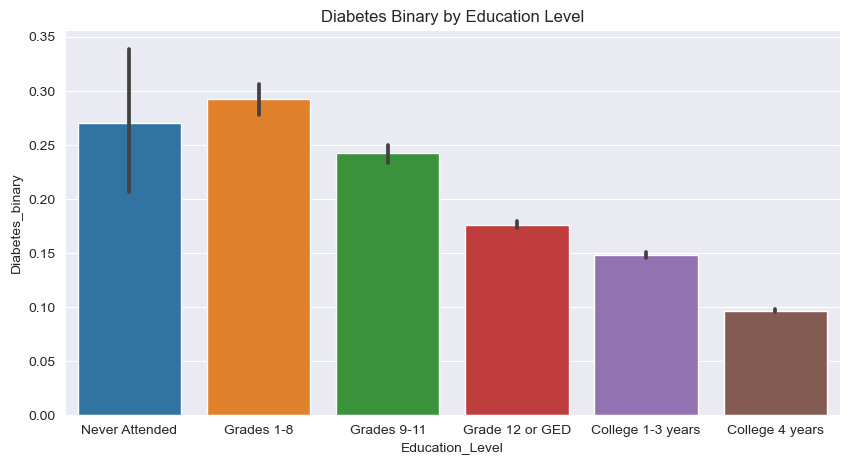

In [77]:
diabetes_df['Education_Level'] = pd.cut(diabetes_df['Education'], bins=[0, 1, 2, 3, 4, 5, 6],
labels=['Never Attended', 'Grades 1-8', 'Grades 9-11', 'Grade 12 or GED', 'College 1-3 years', 'College 4 years'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Education_Level', y='Diabetes_binary', data=diabetes_df)
plt.title('Diabetes Binary by Education Level')
plt.show()


**Individuals with lower levels of education have a higher prevalence of diabetes. Notably, those who never attended school or only attended grades 1-8 exhibit the highest rates of diabetes. Conversely, those who completed college, show lower rates of diabetes.**

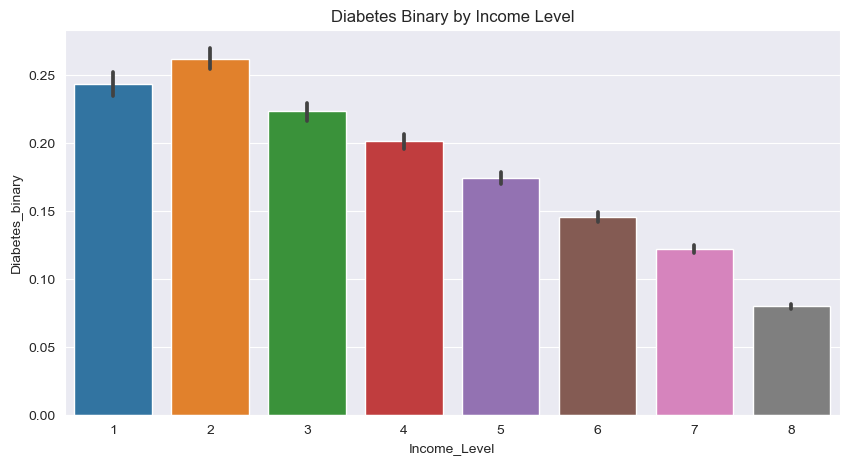

In [78]:
diabetes_df['Income_Level'] = pd.cut(diabetes_df['Income'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8],
labels=['1', '2', '3', '4', '5', '6', '7', '8'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Income_Level', y='Diabetes_binary', data=diabetes_df)
plt.title('Diabetes Binary by Income Level')
plt.show()


**The graph showcases a clear trend where individuals with lower income levels have a higher prevalence of diabetes. The trend inversely correlates income level with diabetes risk, indicating that as income level increases, the likelihood of having diabetes decreases**

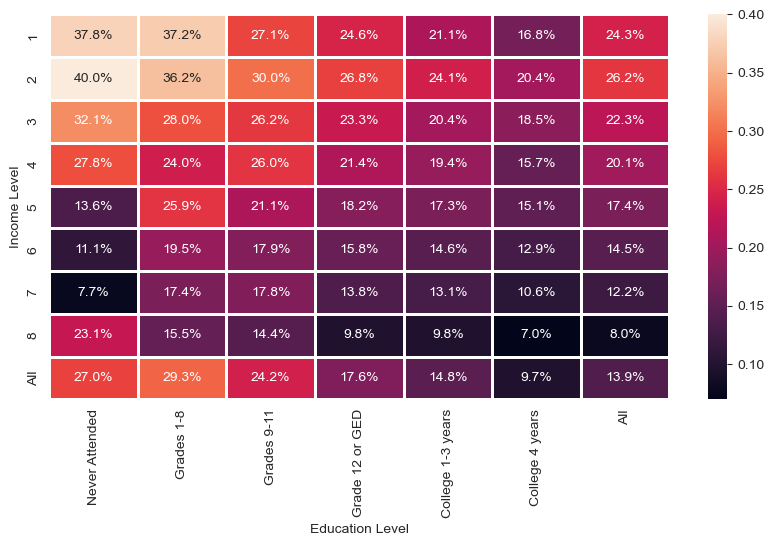

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
a = pd.crosstab(diabetes_df['Income_Level'], diabetes_df['Education_Level'], diabetes_df['Diabetes_binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Income Level')
plt.xlabel('Education Level')
plt.show()

**The heatmap provides a detailed view of how diabetes prevalence varies across different combinations of income and education levels. The heatmap highlights the disparities in diabetes prevalence related to socioeconomic factors as individuals with a higher education and income level have a lower risk of diabetes, offering insights for targeted public health interventions**

In [109]:
th2 = 0.30
for v in variables: 
    for x in variables:
        if v != x: 
            r = diabetes_df.groupby([v,x]).mean(numeric_only=True)['Diabetes_binary']
            if not r[r>th2].empty:
                print(r[r>th2])
                print('----------------------------------------')

HighBP  BMI_Category    
1.0     30 lbs and above    0.328287
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  Stroke
1.0     1.0       0.366033
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  HeartDiseaseorAttack
1.0     1.0                     0.372602
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  PhysActivity
1.0     0.0             0.30934
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  GenHlth
1.0     4.0        0.380227
        5.0        0.455338
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  MentHlth_Category
1.0     11-20 Days           0.305483
        21-30 Days           0.328424
Name: Diabetes_binary, dtype: float64
----------------------------------------
HighBP  PhysHlth_Category
1.0     11-20 Days           0.342342
        21-30 Days           0.376442
Name: Diabetes_binary, 

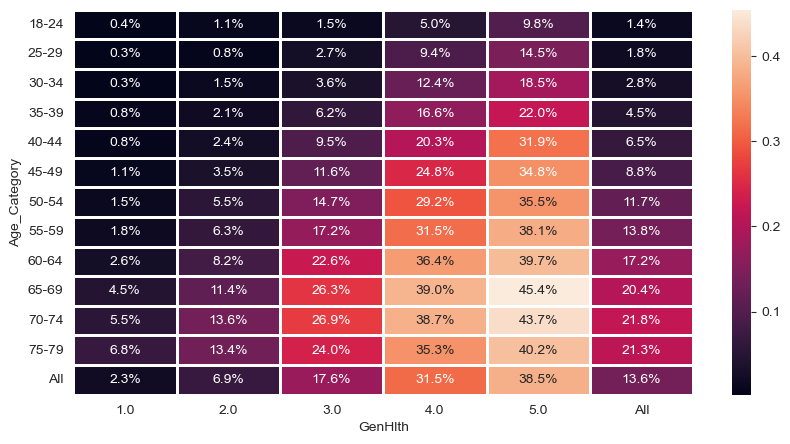

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
diabetes_df['Age_Category'] = pd.cut(diabetes_df['Age'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'])
a = pd.crosstab(diabetes_df['Age_Category'], diabetes_df['GenHlth'], diabetes_df['Diabetes_binary'], aggfunc='mean', margins=True)
sns.heatmap(a, annot=True, fmt = '.1%', linewidth=1., ax=ax)
plt.ylabel('Age_Category')
plt.xlabel('GenHlth')
plt.show()

**Individuals who are in the higher age category, specifically beginning at ages 40-44, have a higher prevalence of diabetes. Additionally, within each age category, poorer general health ratings are associated with the increase in age. While age is a non-modifiable risk factor, general health can be influenced by lifestyle choices and medical intervention** 

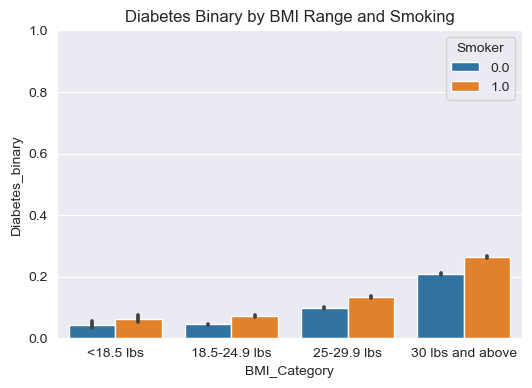

In [108]:
plt.figure(figsize=(6, 4))
sns.barplot(x='BMI_Category', y='Diabetes_binary', data=diabetes_df, hue='Smoker')
plt.ylim(0,1)
plt.title('Diabetes Binary by BMI Range and Smoking')
plt.show()

**As BMI increases, the prevalence of diabetes increases signficantly. The impact of smoking increases the prevalence of diabetes slightly compared to non-smokers. This suggests that both lifestyle factors and genetic predispositions are contributing factors to the overall risk of developing diabetes**

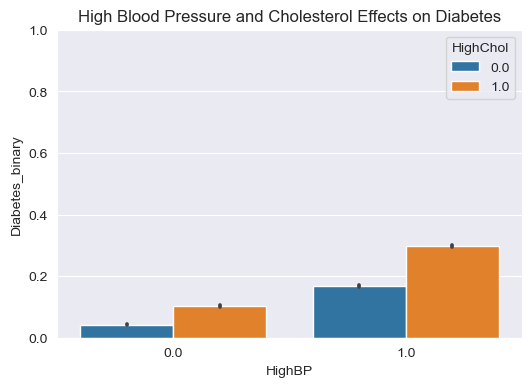

In [81]:
plt.figure(figsize=(6, 4))
sns.barplot(x='HighBP', y='Diabetes_binary', data=diabetes_df, hue='HighChol')
plt.ylim(0,1)
plt.title('High Blood Pressure and Cholesterol Effects on Diabetes')
plt.show()

**Individuals have an increased prevalence of diabetes if they have both high blood pressure and high cholesterol compared to those with neither conditions. The bar plot reflects the cumulative effect of these risk factors on diabetes**

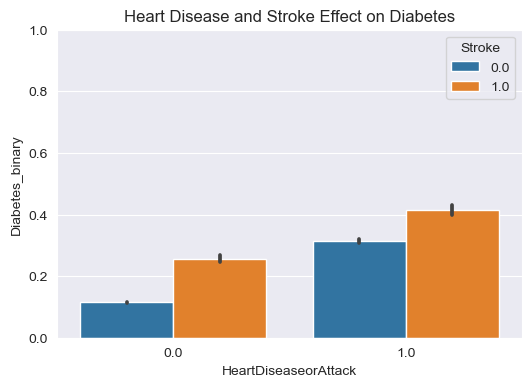

In [82]:
plt.figure(figsize=(6, 4))
sns.barplot(x='HeartDiseaseorAttack', y='Diabetes_binary', data=diabetes_df, hue='Stroke')
plt.ylim(0,1)
plt.title('Heart Disease and Stroke Effect on Diabetes')
plt.show()

**Individuals with both heart disease or attack and stroke history exhibit the highest prevalence of diabetes, slightly greater than 40%. The graph suggests a compound risk when multiple cardiovascular conditions are present, underscoring the importance of integrated healthcare approaches to manage these interconnected issues**

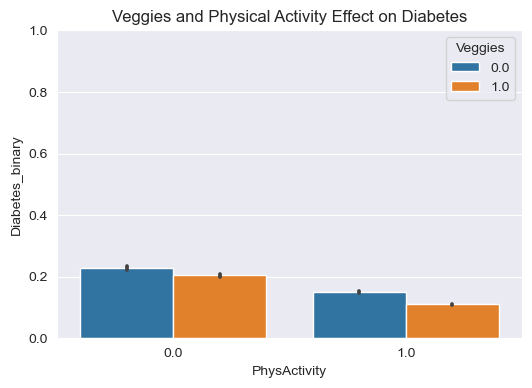

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(x='PhysActivity', y='Diabetes_binary', data=diabetes_df, hue='Veggies')
plt.ylim(0,1)
plt.title('Veggies and Physical Activity Effect on Diabetes')
plt.show()

**Individuals who engage in physical activity as well as those who eat vegetables show the lowest prevalence of diabetes. This suggests a synergistic effect, where the combination of these healthy lifestyle choices offers greater protection against diabetes than either factor alone**

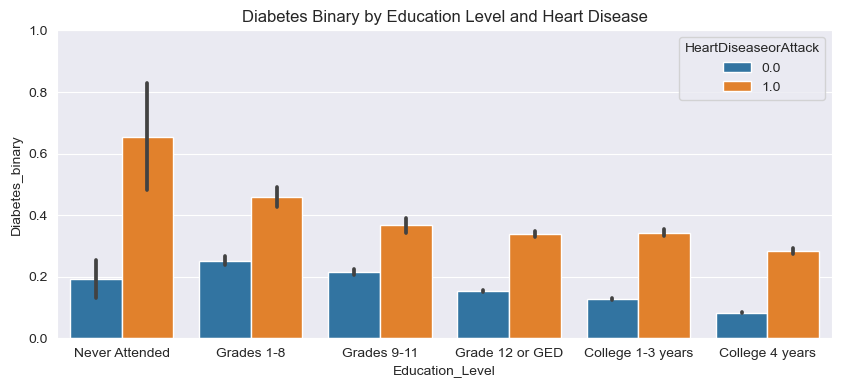

In [107]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Education_Level', y='Diabetes_binary', data=diabetes_df, hue='HeartDiseaseorAttack')
plt.ylim(0,1)
plt.title('Diabetes Binary by Education Level and Heart Disease')
plt.show()

**Individuals with a lower education level (Never Attended) and history of heart disease have 65% chance of developing diabetes. The plot highlights the socioeconomic factors that influence health outcomes and the need for targeted interventions that address both education and health disparities**